# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

# Propósito y objetivos del proyecto

El objetivo principal de este proyecto es averiguar cual de los dos planes de prepago que ofrece Megaline, genera más ingresos, esto conlleva un proceso que incluye la visualización inicial de los datos, el procesamiento y limpieza, y la aplicación de métodos estadísticos para comprobar y verificar nuestros hallazgos. Para obtener la información solicitada, planeo primeramente garantizar la calidad e integridad de la información, verificando tipos de datos, valores nulos, valores duplicados. Después talvez tenga que unir DataFrames, analizaré el comportamiento de los clientes para identificar patrones y comprenderlos, por ultimo realizaré distintas pruebas de hipótesis mediante los métodos de el módulo stats de la librería scipy. Esto nos permitira no solo saber cual de los dos planes genera más ingresos, sino tener un panorama y contexto mucho mayor acerca del comportamiento de los clientes, el tiempo que usan el servicio, la medida en que lo usan, cuanto paga cada cliente, etc. 
Muchas cosas las iremos descubriendo y haciendo en el camino, pero sin más preambulos, comencemos.

## Inicialización

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

## Cargar datos

In [2]:
calls_df = pd.read_csv('Megaline Telecom Dataset/megaline_calls.csv')
internet_df = pd.read_csv('Megaline Telecom Dataset/megaline_internet.csv')
messages_df = pd.read_csv('Megaline Telecom Dataset/megaline_messages.csv')
plans_df = pd.read_csv('Megaline Telecom Dataset/megaline_plans.csv')
users_df = pd.read_csv('Megaline Telecom Dataset/megaline_users.csv')

## Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
plans_df.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Este DataFrame contiene toda la información sobre los dos planes de prepago de Megaline, debido a que el DF solo tiene 2 filas, podemos visualizar la tabla completamente. A simple vista, podemos notar como el plan surf es como un plan estandar, mientras que el ultimate, es un plan premium, el plan ultimate es más costoso, pero incluye mejores beneficios y si lo comparamos objetivamente, resulta ser más barato ya que el costo unitario de los megabytes, minutos, mensajes, etc. es menor.

En cuanto a la calidad de los datos, no hay ningún problema, los tipos de datos están bien y no hay necesidad de cambiar ni verificar nada más, por el momento.

## Corregir datos

In [5]:
#No existe ningún problema

## Enriquecer los datos

In [6]:
#Este DataFrame solo muestra la información de los dos planes, ya contiene toda la información necesaria para nosotros. 
#(No es necesario agregar nada más)

## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Imprime una muestra de datos para usuarios

users_df.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


Este DataFrame incluye la información general de una muestra de 500 usuarios, que es con la que estaremos trabajando, estos usuarios están suscritos a alguno de los dos planes, surf o ultimate. Contamos con su nombre, ubicación, edad, id de usuario, fecha de suscripción y en algunos casos fecha de cancelación, así como el plan al que están suscritos. (El DF está ordenado por user_id, desde 1000 a 1499)

En cuanto a los problemas de calidad, solo encuentro que las columnas reg_date y churn_date son de tipo object, la columna churn date tiene valores ausentes pero no hay problema ya que esto quiere decir que estos clientes seguían activos cuando se extrajo esta base de datos. Convertiremos estas columnas a tipo datetime y dejaremos los valores ausentes utilizando el parametro errors = coerce.

### Corregir los datos

In [9]:
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'])
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], errors = 'coerce')
#Convertimos a tipo datetime, ahora vamos a verificar los tipos de datos de las columnas.
users_df.dtypes

user_id                int64
first_name            object
last_name             object
age                    int64
city                  object
reg_date      datetime64[ns]
plan                  object
churn_date    datetime64[ns]
dtype: object

In [10]:
#Vamos a comprobar valores duplicados
print(users_df.duplicated().sum())
#Comprobamos solo los duplicados de la columna user_id ya que esto al ser un identificador único, no debería repetirse.
print(users_df['user_id'].duplicated().sum())

0
0


### Enriquecer los datos

Voy a crear dos nuevas columnas, 'reg_month' y 'reg_day' para poder analizar después el comportamiento de los usuarios en base al mes del año y al día del mes en el que se suscribieron a la tarifa. Aunque es posible que estas columnas no las utilizemos, es mejor tenerlas a no tenerlas.

In [11]:
users_df['reg_month'] = users_df['reg_date'].dt.month
users_df['reg_day'] = users_df['reg_date'].dt.day
users_df.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month,reg_day
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12,24
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8,13
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,10,21
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,1,28
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,5,23


## Llamadas

In [12]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [13]:
# Imprime una muestra de datos para las llamadas

calls_df.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Este DataFrame contiene la información de cada llamada que realizaron nuestra muestra de 500 usuarios en el 2018, contiene el id único de la llamada, el id del usuario, la fecha en la que se realizó la llamada y la duración de esta en minutos.
Con respecto a la calidad de los datos, no hay valores ausentes, convertiré la columna call_date a tipo datetime, y vamos a redondear la columna duration al entero superior, debido a que así lo maneja Megaline, si te pasas un segundo, te cobran el siguiente minuto, no tiene caso conservar los decimales.

### Corregir los datos

In [14]:
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])
calls_df.dtypes

id                   object
user_id               int64
call_date    datetime64[ns]
duration            float64
dtype: object

In [15]:
#Vamos a comprobar valores duplicados
print(calls_df.duplicated().sum())
print(calls_df['id'].duplicated().sum())

0
0


In [16]:
#Redondeamos los valores de la columna duration al entero superior y convertimos a tipo int
calls_df['duration'] = np.ceil(calls_df['duration']).astype(int)
calls_df.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5


### Enriquecer los datos

De igual manera agregaré dos columnas, call_month y call_day, para después poder analizar la distribución de llamadas realizadas por mes y dia del año.

In [17]:
calls_df['call_month'] = calls_df['call_date'].dt.month
calls_df['call_day'] = calls_df['call_date'].dt.day
calls_df.head()

,id,user_id,call_date,duration,call_month,call_day
0,1000_93,1000,2018-12-27,9,12,27
1,1000_145,1000,2018-12-27,14,12,27
2,1000_247,1000,2018-12-27,15,12,27
3,1000_309,1000,2018-12-28,6,12,28
4,1000_380,1000,2018-12-30,5,12,30


## Mensajes

In [18]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [19]:
# Imprime una muestra de datos para los mensajes

messages_df.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Este DataFrame contiene la información de cada mensaje enviado por la muestra de 500 usuarios, cuenta con un id único de mensaje, el id de usuario y la fecha en la que se envio ese mensaje. 

Vamos a convertir la ultima columna a tipo DateTime y a verificar valores duplicados, no existen valores ausentes.

### Corregir los datos

In [20]:
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'])
messages_df.dtypes

id                      object
user_id                  int64
message_date    datetime64[ns]
dtype: object

In [21]:
#Vamos a comprobar valores duplicados
print(messages_df.duplicated().sum())
print(messages_df['id'].duplicated().sum())

0
0


### Enriquecer los datos

A continuación vamos a agregar dos columnas, una de mes y otra de día para poder analizar la distribución de mensajes enviados por día y mes del año, después.

In [22]:
messages_df['month'] = messages_df['message_date'].dt.month
messages_df['day'] = messages_df['message_date'].dt.day
messages_df.head()

,id,user_id,message_date,month,day
0,1000_125,1000,2018-12-27,12,27
1,1000_160,1000,2018-12-31,12,31
2,1000_223,1000,2018-12-31,12,31
3,1000_251,1000,2018-12-27,12,27
4,1000_255,1000,2018-12-26,12,26


## Internet

In [23]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [24]:
# Imprime una muestra de datos para el tráfico de internet

internet_df.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Este DataFrame contiene la información de cada sesión de uso de internet de los usuarios de la muestra, contiene el id de la sesión, el id de usuario, la fecha de la sesión y los megabytes utilizados en esa sesión. En cuanto a la calidad de los datos, no hay valores auesentes, voy a comprobar valores duplicados, transformaré la columna session date a tipo datetime.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [25]:
#Comprobamos is hay filas completamente  duplicadas
print(internet_df.duplicated().sum())
#Comprobamos los valores duplicados en la columna id, ya que debe de ser unico.
print(internet_df['id'].duplicated().sum())

0
0


In [26]:
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])
internet_df.dtypes

id                      object
user_id                  int64
session_date    datetime64[ns]
mb_used                float64
dtype: object

### Enriquecer los datos

Vamos a crear dos columnas con el més y día, me interesa más el mes, para poder posteriormente calcular cuantos mensajes envió cada usuario por mes, pero también podriamos analizar la distribución de mensajes enviados por día y mes del año.

In [27]:
internet_df['session_month'] = internet_df['session_date'].dt.month
internet_df['session_day'] = internet_df['session_date'].dt.day
internet_df.head()

,id,user_id,session_date,mb_used,session_month,session_day
0,1000_13,1000,2018-12-29,89.86,12,29
1,1000_204,1000,2018-12-31,0.00,12,31
2,1000_379,1000,2018-12-28,660.40,12,28
3,1000_413,1000,2018-12-26,270.99,12,26
4,1000_442,1000,2018-12-27,880.22,12,27


## Estudiar las condiciones de las tarifas

In [28]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans_df


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario



In [29]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_per_month = calls_df.pivot_table(index = ['user_id', 'call_month'], values = 'id', aggfunc = ['count']).reset_index()
calls_per_month.columns = ['user_id', 'month', 'number_of_calls']
calls_per_month

,user_id,month,number_of_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [30]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
mins_per_month = calls_df.pivot_table(index = ['user_id', 'call_month'], values = 'duration', aggfunc = ['sum']).reset_index()
mins_per_month.columns = ['user_id', 'month', 'total_minutes']
mins_per_month

,user_id,month,total_minutes
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426
...,...,...,...
2253,1498,12,339
2254,1499,9,346
2255,1499,10,385
2256,1499,11,308


In [31]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_per_month = messages_df.pivot_table(index = ['user_id', 'month'], values = 'id', aggfunc = ['count']).reset_index()
messages_per_month.columns = ['user_id', 'month', 'number_of_messages']
messages_per_month

,user_id,month,number_of_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [32]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
mb_per_month = internet_df.pivot_table(index = ['user_id', 'session_month'], values = 'mb_used', aggfunc = ['sum']).reset_index()
mb_per_month.columns = ['user_id', 'month', 'total_megabytes']
#Ahora voy a crear otra columna que contenga el total de gigabytes por usuario al mes, para esto,
#dividimos el número de megabytes entre 1024 ya que 1 gigabyte = 1024 megabytes.
mb_per_month['total_gigabytes'] = mb_per_month['total_megabytes'] / 1024
#Ahora redondeamos el total de gigabytes al mes al entero superior ya que así lo maneja Megaline.
#Por ejemplo, el primer usuario no llego a los 2048 megabytes, pero redondeamos y frente a megaline, utilizo 2 gigas.
mb_per_month['total_gigabytes'] = np.ceil(mb_per_month['total_gigabytes']).astype(int)

mb_per_month

,user_id,month,total_megabytes,total_gigabytes
0,1000,12,1901.47,2
1,1001,8,6919.15,7
2,1001,9,13314.82,14
3,1001,10,22330.49,22
4,1001,11,18504.30,19
...,...,...,...,...
2272,1498,12,23137.69,23
2273,1499,9,12984.76,13
2274,1499,10,19492.43,20
2275,1499,11,16813.83,17


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [33]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
#Vamos a unir los 4 DataFrames utilizando Merge, en el parametro how, usaremos 'outer', para no perder los valores en los que
#el usuario no tuvo actividad.
total_per_user = calls_per_month.merge(mins_per_month, on = ['user_id', 'month'], how = 'outer')
total_per_user = total_per_user.merge(messages_per_month, on = ['user_id', 'month'], how = 'outer')
total_per_user = total_per_user.merge(mb_per_month, on = ['user_id', 'month'], how = 'outer')
#Rellenamos los valores ausentes con 0, indicando que el usuario no tuvo actividad.
total_per_user = total_per_user.fillna(0)
total_per_user

,user_id,month,number_of_calls,total_minutes,number_of_messages,total_megabytes,total_gigabytes
0,1000,12,16.0,124.0,11.0,1901.47,2.0
1,1001,8,27.0,182.0,30.0,6919.15,7.0
2,1001,9,49.0,315.0,44.0,13314.82,14.0
3,1001,10,65.0,393.0,53.0,22330.49,22.0
4,1001,11,64.0,426.0,36.0,18504.30,19.0
...,...,...,...,...,...,...,...
2288,1498,12,39.0,339.0,0.0,23137.69,23.0
2289,1499,9,41.0,346.0,0.0,12984.76,13.0
2290,1499,10,53.0,385.0,0.0,19492.43,20.0
2291,1499,11,45.0,308.0,0.0,16813.83,17.0


In [34]:
# Añade la información de la tarifa
total_per_user = total_per_user.merge(users_df, how = 'inner', on = ['user_id'])

In [35]:
total_per_user = total_per_user.merge(plans_df, how = 'inner', left_on = 'plan', right_on = 'plan_name')

In [36]:
total_per_user

,user_id,month,number_of_calls,total_minutes,number_of_messages,total_megabytes,total_gigabytes,first_name,last_name,age,...,reg_month,reg_day,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12,16.0,124.0,11.0,1901.47,2.0,Anamaria,Bauer,45,...,12,24,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,8,27.0,182.0,30.0,6919.15,7.0,Mickey,Wilkerson,28,...,8,13,50,15360,500,20,10,0.03,0.03,surf
2,1001,9,49.0,315.0,44.0,13314.82,14.0,Mickey,Wilkerson,28,...,8,13,50,15360,500,20,10,0.03,0.03,surf
3,1001,10,65.0,393.0,53.0,22330.49,22.0,Mickey,Wilkerson,28,...,8,13,50,15360,500,20,10,0.03,0.03,surf
4,1001,11,64.0,426.0,36.0,18504.30,19.0,Mickey,Wilkerson,28,...,8,13,50,15360,500,20,10,0.03,0.03,surf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,12,39.0,339.0,0.0,23137.69,23.0,Scot,Williamson,51,...,2,4,50,15360,500,20,10,0.03,0.03,surf
2289,1499,9,41.0,346.0,0.0,12984.76,13.0,Shena,Dickson,37,...,5,6,50,15360,500,20,10,0.03,0.03,surf
2290,1499,10,53.0,385.0,0.0,19492.43,20.0,Shena,Dickson,37,...,5,6,50,15360,500,20,10,0.03,0.03,surf
2291,1499,11,45.0,308.0,0.0,16813.83,17.0,Shena,Dickson,37,...,5,6,50,15360,500,20,10,0.03,0.03,surf


In [37]:
# Calcula el ingreso mensual para cada usuario
#Paar calcular el ingreso mensual por usuario voy a crear una función que reciba una fila, la funcion compara el total usado por usuario al mes
#en las distintas categorías, con lo que incluye su respectivo plan, si el usuario excede, le agregamos una tarifa extra, la cual está indicada en el DF
#Al final aplicamos esta función al DataFrame para crear una columna nueva en la que cada celda representa el total de un usuario del mes que indica la fila.
def total_income(row):
    total_income = row['usd_monthly_pay']
    if row['total_minutes'] > row['minutes_included']:
        total_income += row['usd_per_minute'] * (row['total_minutes'] - row['minutes_included'])
        
    elif row['number_of_messages'] > row['messages_included']:
        total_income += row['usd_per_message'] * (row['number_of_messages'] - row['messages_included'])
        
    elif row['total_megabytes'] > row['mb_per_month_included']:
        total_income += row['usd_per_gb'] * np.ceil((row['total_megabytes'] - row['mb_per_month_included']) / 1024)
        
    return total_income
    

In [38]:
total_per_user['total_income'] = total_per_user.apply(total_income, axis = 1)

In [39]:
#A continuación verificamos el total por mes de cada usuario.
total_per_user

,user_id,month,number_of_calls,total_minutes,number_of_messages,total_megabytes,total_gigabytes,first_name,last_name,age,...,reg_day,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,total_income
0,1000,12,16.0,124.0,11.0,1901.47,2.0,Anamaria,Bauer,45,...,24,1000,30720,3000,70,7,0.01,0.01,ultimate,70.00
1,1001,8,27.0,182.0,30.0,6919.15,7.0,Mickey,Wilkerson,28,...,13,50,15360,500,20,10,0.03,0.03,surf,20.00
2,1001,9,49.0,315.0,44.0,13314.82,14.0,Mickey,Wilkerson,28,...,13,50,15360,500,20,10,0.03,0.03,surf,20.00
3,1001,10,65.0,393.0,53.0,22330.49,22.0,Mickey,Wilkerson,28,...,13,50,15360,500,20,10,0.03,0.03,surf,20.09
4,1001,11,64.0,426.0,36.0,18504.30,19.0,Mickey,Wilkerson,28,...,13,50,15360,500,20,10,0.03,0.03,surf,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,12,39.0,339.0,0.0,23137.69,23.0,Scot,Williamson,51,...,4,50,15360,500,20,10,0.03,0.03,surf,100.00
2289,1499,9,41.0,346.0,0.0,12984.76,13.0,Shena,Dickson,37,...,6,50,15360,500,20,10,0.03,0.03,surf,20.00
2290,1499,10,53.0,385.0,0.0,19492.43,20.0,Shena,Dickson,37,...,6,50,15360,500,20,10,0.03,0.03,surf,70.00
2291,1499,11,45.0,308.0,0.0,16813.83,17.0,Shena,Dickson,37,...,6,50,15360,500,20,10,0.03,0.03,surf,40.00


## Estudia el comportamiento de usuario

### Llamadas

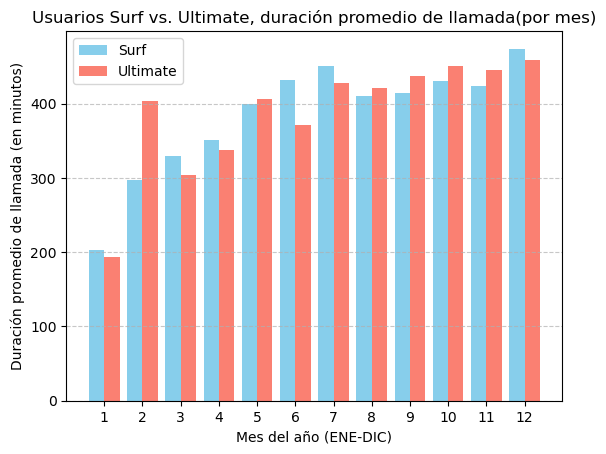

In [70]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
surf_users = total_per_user.query('plan_name == "surf"')
surf_minutes_mean = surf_users.groupby('month')['total_minutes'].mean()

ultimate_users = total_per_user.query('plan_name == "ultimate"')
ultimate_minutes_mean = ultimate_users.groupby('month')['total_minutes'].mean()
months = np.arange(1, 13)
width = 0.4  


surf_values = surf_minutes_mean.reindex(months, fill_value=0)
ultimate_values = ultimate_minutes_mean.reindex(months, fill_value=0)



plt.bar(months - width/2, surf_values, width=width, label='Surf', color='skyblue')
plt.bar(months + width/2, ultimate_values, width=width, label='Ultimate', color='salmon')


plt.title('Usuarios Surf vs. Ultimate, duración promedio de llamada(por mes)')
plt.xlabel('Mes del año (ENE-DIC)')
plt.ylabel('Duración promedio de llamada (en minutos)')
plt.xticks(months)  
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

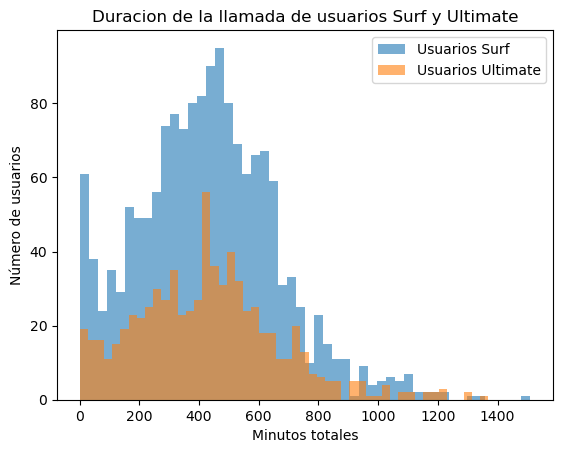

In [69]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
surf_minutes = surf_users['total_minutes']
ultimate_minutes = ultimate_users['total_minutes']

surf_minutes.plot(kind = 'hist', 
                  bins=50, 
                  alpha=0.6)
ultimate_minutes.plot(kind = 'hist', 
                      title = 'Duracion de la llamada de usuarios Surf y Ultimate', 
                      bins = 50, 
                      alpha = 0.6, 
                      xlabel = 'Minutos totales', 
                      ylabel = 'Número de usuarios')
plt.legend(['Usuarios Surf', 'Usuarios Ultimate'])
plt.show

In [42]:
# Vamos a calcular la media y la varianza de la duración mensual de llamadas.
surf_users_mean_call = surf_users['total_minutes'].mean()
ultimate_users_mean_call = ultimate_users['total_minutes'].mean()

total_min_var_surf = np.var(surf_users['total_minutes'])
total_min_std_surf = np.sqrt(total_min_var_surf)

total_min_var_ultimate = np.var(ultimate_users['total_minutes'])
total_min_std_ultimate = np.sqrt(total_min_var_ultimate)

print('Media, Varianza y desviación estandar de la duración total de las llamadas de los usuarios Surf:')
print()
print('Media:', surf_users_mean_call)
print('Varianza:', total_min_var_surf)
print('Desviación estandar:', total_min_std_surf)
print()
print()
print('Media, Varianza y desviación estandar de la duración total de las llamadas de los usuarios Ultimate:')
print()
print('Media:', ultimate_users_mean_call)
print('Varianza:', total_min_var_ultimate)
print('Desviación estandar:', total_min_std_ultimate)

Media, Varianza y desviación estandar de la duración total de las llamadas de los usuarios Surf:

Media: 428.7495232040687
Varianza: 54933.33459131743
Desviación estandar: 234.37861376695065


Media, Varianza y desviación estandar de la duración total de las llamadas de los usuarios Ultimate:

Media: 430.45
Varianza: 57764.12527777776
Desviación estandar: 240.34168443650753


<Axes: xlabel='total_minutes'>

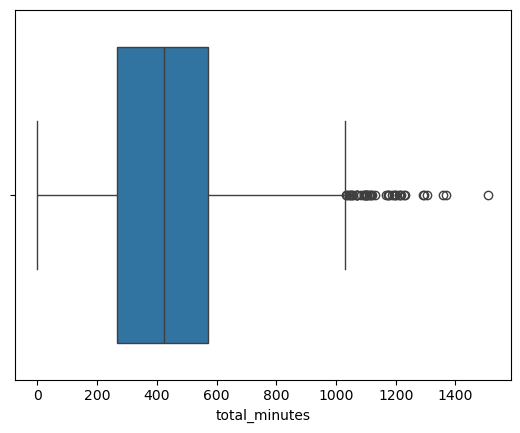

In [43]:
# Voy a trazar un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
import seaborn as sns
sns.boxplot(total_per_user['total_minutes'], orient = 'h')

En las celdas anteriores podemos visualizar algunas metricas y un diagrama de caja y bigotes para estudiar el comportamiento de los usuarios con repecto a la duración de llamadas. Partiendo de eso, la duración promedio de llamada para los usuarios del plan Surf es de 428.749, por otro lado para el plan Ultimate es de 430.45, es interesante porque esto nos deja ver que los usuarios Surf y Ultimate, hablan relativamente casi lo mismo. También podemos ver que tanto como la varianza y desviación estandar de los dos planes es bastante similar, en ambos casos, la varianza y desviación estandar es poco significativamente mayor para el plan Ultimate. Tanto la varianza como la desviación estandar en ambos casos, es decir para el plan Surf y Ultimate, son muy grandes. Si utilizaramos el coeficiente de variación, nos daría muy probablemente más de .50, esto implica que los datos están bastante dispersos. 

Después observamos el diagrama de caja y bigotes, mediante el cual podemos ver la distribución de los datos de la duración promedio de las llamadas para los usuarios de ambos planes, la mediana se encuntra un poco después de los 400 minutos, y se observan varios valores atípicos, es decir valores que están a más de 1.5 veces del rango intercuartílico. 

Respondiendo la pregunta "¿El comportamiento de los usuarios con respecto a la duración de las llamadas varia dependiendo del plan?", me atrevería a decir que no, el comportamiento de los usuarios es relativamente similar, lo podemos ver en el histograma antes presentado, la forma de la distribución es bastante parecida, solo que hay más usuarios del plan Surf que del plan Ultimate. Algo que noté y que me parece importante destacar es que más de 500 usuarios del plan Surf exceden el limite de sus minutos y terminan pagando tarifas extra. Podriamos profundizar en el estudio del comportamiento de estos usuarios en específico y darnos cuenta de cuanto pagan al mes aproximadamente, a traves de esto podriamos implementar alguna estrategía de marketing para estos clientes que pagan más debido al exceso en los limites.

### Mensajes

<function matplotlib.pyplot.show(close=None, block=None)>

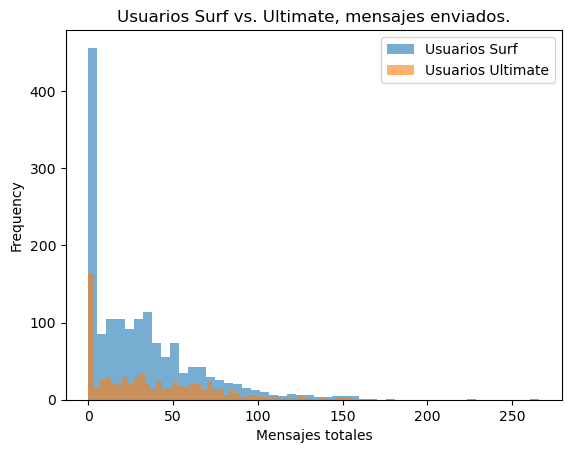

In [66]:
# Voy a comparar el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
surf_messages = surf_users['number_of_messages']
ultimate_messages = ultimate_users['number_of_messages']

surf_messages.plot(kind = 'hist', 
                  bins=50, 
                  alpha=0.6)
ultimate_messages.plot(kind = 'hist', 
                      title = 'Usuarios Surf vs. Ultimate, mensajes enviados.', 
                      bins = 50, 
                      alpha = 0.6, 
                      xlabel = 'Mensajes totales')
plt.legend(['Usuarios Surf', 'Usuarios Ultimate'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

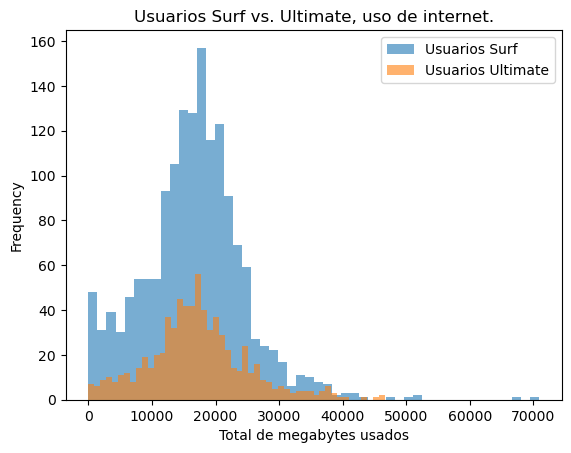

In [65]:
# Comparamos la cantidad de tráfico de Internet consumido por usuarios por plan
surf_internet = surf_users['total_megabytes']
ultimate_internet = ultimate_users['total_megabytes']

surf_internet.plot(kind = 'hist', 
                  bins=50, 
                  alpha=0.6)
ultimate_internet.plot(kind = 'hist', 
                      title = 'Usuarios Surf vs. Ultimate, uso de internet.', 
                      bins = 50, 
                      alpha = 0.6, 
                      xlabel = 'Total de megabytes usados')
plt.legend(['Usuarios Surf', 'Usuarios Ultimate'])
plt.show

In [46]:
surf_users_mean_messages = surf_users['number_of_messages'].mean()
ultimate_users_mean_messages = ultimate_users['number_of_messages'].mean()

total_messages_var_surf = np.var(surf_users['number_of_messages'])
total_messages_std_surf = np.sqrt(total_messages_var_surf)

total_messages_var_ultimate = np.var(ultimate_users['number_of_messages'])
total_messages_std_ultimate = np.sqrt(total_messages_var_ultimate)

print('Media, Varianza y desviación estandar de el total de mensajes enviados de los usuarios Surf:')
print()
print('Media:', surf_users_mean_messages)
print('Varianza:', total_messages_var_surf)
print('Desviación estandar:', total_messages_std_surf)
print()
print()
print('Media, Varianza y desviación estandar de el total de mensajes enviados de los usuarios Ultimate:')
print()
print('Media:', ultimate_users_mean_messages)
print('Varianza:', total_messages_var_ultimate)
print('Desviación estandar:', total_messages_std_ultimate)

Media, Varianza y desviación estandar de el total de mensajes enviados de los usuarios Surf:

Media: 31.15956770502225
Varianza: 1126.0082317266638
Desviación estandar: 33.556046127734774


Media, Varianza y desviación estandar de el total de mensajes enviados de los usuarios Ultimate:

Media: 37.55138888888889
Varianza: 1207.0779147376504
Desviación estandar: 34.74302685054442


Para los dos planes podemos ver estadísticas relativamente similares, los usuarios del plan Surf envian en promedio 31.159 mensajes al mes, mientras que los usuarios de ultimate envian 33.551 mensajes al mes en promedio. La desviación estandar y varianza son poco significativamente mayores para el plan Ultimate. Analizando la desviación estandar podemos ver que para los mesnajes los datos también estan bastante dispersos, en relación a la media, algo que me llamo la atención son los valores atípicos, para los mensajes, hay usuarios de Surf que llegaron a enviar más de 250 mensajes en un mes, cuando el plan Surf incluye 50 sms como máximo.

Para los mensajes, el comportamiento de los usuarios no varia dependiendo del plan, es bastante similar.

### Internet

<function matplotlib.pyplot.show(close=None, block=None)>

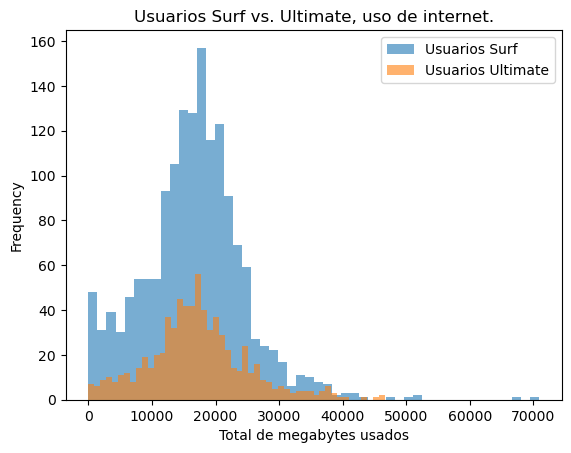

In [64]:
surf_internet = surf_users['total_megabytes']
ultimate_internet = ultimate_users['total_megabytes']

surf_internet.plot(kind = 'hist', 
                  bins=50, 
                  alpha=0.6)
ultimate_internet.plot(kind = 'hist', 
                      title = 'Usuarios Surf vs. Ultimate, uso de internet.', 
                      bins = 50, 
                      alpha = 0.6, 
                      xlabel = 'Total de megabytes usados')
plt.legend(['Usuarios Surf', 'Usuarios Ultimate'])
plt.show

In [48]:
surf_users_mean_mb = surf_users['total_megabytes'].mean()
ultimate_users_mean_mb = ultimate_users['total_megabytes'].mean()

total_mb_var_surf = np.var(surf_users['total_megabytes'])
total_mb_std_surf = np.sqrt(total_mb_var_surf)

total_mb_var_ultimate = np.var(ultimate_users['total_megabytes'])
total_mb_std_ultimate = np.sqrt(total_mb_var_ultimate)

print('Media, Varianza y desviación estandar de el uso total de megabytes de los usuarios Surf:')
print()
print('Media:', surf_users_mean_mb)
print('Varianza:', total_mb_var_surf)
print('Desviación estandar:', total_mb_std_surf)
print()
print()
print('Media, Varianza y desviación estandar de el uso total de megabytes de los usuarios Ultimate:')
print()
print('Media:', ultimate_users_mean_mb)
print('Varianza:', total_mb_var_ultimate)
print('Desviación estandar:', total_mb_std_ultimate)

Media, Varianza y desviación estandar de el uso total de megabytes de los usuarios Surf:

Media: 16558.283490146216
Varianza: 64175571.6830134
Desviación estandar: 8010.96571475708


Media, Varianza y desviación estandar de el uso total de megabytes de los usuarios Ultimate:

Media: 17214.699694444444
Varianza: 61566665.13868625
Desviación estandar: 7846.442833455569


<Axes: xlabel='total_megabytes'>

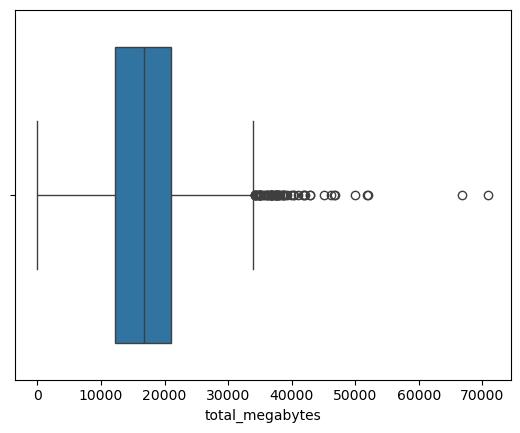

In [49]:
sns.boxplot(total_per_user['total_megabytes'], orient = 'h')

Para el uso de internet, el comportamiento de los usuarios varia ligeramente, para los usuarios del plan Surf, utilizan en promedio 16558 megabytes al mes, los usuarios del plan Ultimate, utilizan en pormedio 17214 megabytes al mes, es una diferencia de menos de un gigabyte. Antes de continuar, me gustaría aclarar que para las llamadas, mensajes e internet, el comportamiento si tiene cierta variación, no la considero tan significativa debido a la gran brecha que hay entre los precios y beneficios de ambos planes, el plan ultimate y el plan surf difieren en todo, y la variación que existe entre el comportamiento de los usuarios es muy pequeña, los usuarios del plan Ultimate tienen beneficios mucho mayores que los del plan Surf, sin embargo, no se acercan al limite(hablando específicamente de los usuarios del plan Ultimate).

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

<function matplotlib.pyplot.show(close=None, block=None)>

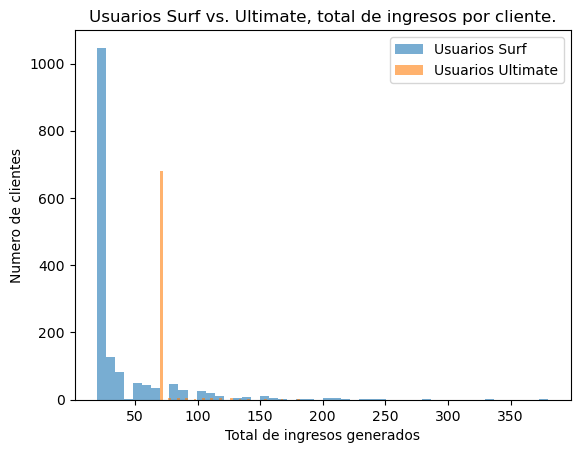

In [62]:
surf_income = surf_users['total_income']
ultimate_income = ultimate_users['total_income']

surf_income.plot(kind = 'hist', 
                  bins=50, 
                  alpha=0.6)
ultimate_income.plot(kind = 'hist', 
                      title = 'Usuarios Surf vs. Ultimate, total de ingresos por cliente.', 
                      bins = 50, 
                      alpha = 0.6, 
                      xlabel = 'Total de ingresos generados', 
                      ylabel = 'Numero de clientes')
plt.legend(['Usuarios Surf', 'Usuarios Ultimate'])
plt.show

plan_name
surf        59200.5
ultimate    52066.0
Name: total_income, dtype: float64


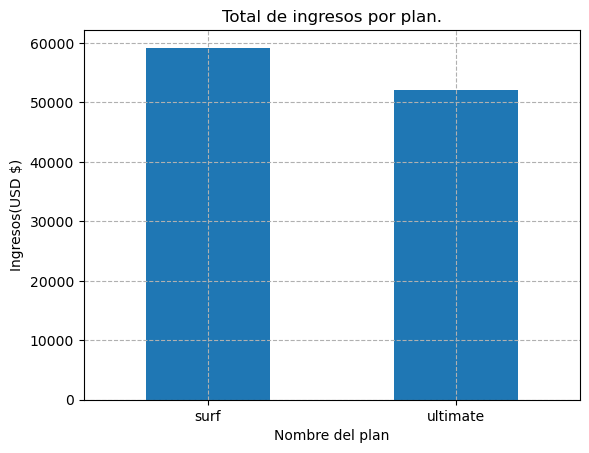

In [61]:
total_income_plans = total_per_user.groupby('plan_name')['total_income'].sum()
total_income_plans.plot(kind = 'bar', 
                        title = 'Total de ingresos por plan.', 
                        xlabel = 'Nombre del plan', 
                        ylabel = 'Ingresos(USD $)', 
                        rot = 0)
plt.grid(linestyle = '--')
plt.show
print(total_income_plans)

In [52]:
surf_users_mean_usd = surf_users['total_income'].mean()
ultimate_users_mean_usd = ultimate_users['total_income'].mean()

total_usd_var_surf = np.var(surf_users['total_income'])
total_usd_std_surf = np.sqrt(total_usd_var_surf)

total_usd_var_ultimate = np.var(ultimate_users['total_income'])
total_usd_std_ultimate = np.sqrt(total_usd_var_ultimate)

print('Media, Varianza y desviación estandar de el ingreso total generado por los usuarios del plan Surf:')
print()
print('Media:', surf_users_mean_usd)
print('Varianza:', total_usd_var_surf)
print('Desviación estandar:', total_usd_std_surf)
print()
print()
print('Media, Varianza y desviación estandar de el ingreso total generado por los usuarios del plan Ultimate:')
print()
print('Media:', ultimate_users_mean_usd)
print('Varianza:', total_usd_var_ultimate)
print('Desviación estandar:', total_usd_std_ultimate)

Media, Varianza y desviación estandar de el ingreso total generado por los usuarios del plan Surf:

Media: 37.63541004450095
Varianza: 1317.6297685063628
Desviación estandar: 36.29917035562057


Media, Varianza y desviación estandar de el ingreso total generado por los usuarios del plan Ultimate:

Media: 72.31388888888888
Varianza: 129.66814043209837
Desviación estandar: 11.387191946748697


En las celdas anteriores podemos observar ciertas estadísticas y visualizaciones con respecto a los ingresos generados, dividido en plan Surf y plan Ultimate, el histograma muestra claramente 2 picos, eso representa la cantidad que la mayor cantidad de usuarios paga, para el plan Surf son 20 dolares al mes mientras que para el plan Ultimate son 70 dolares mensuales, los valores que están fuera de esos intervalos representan excedentes, respectivamente para ambos planes, algo que es muy interesante, es que en todas las categorías analizadas(llamadas, mensajes e internet) hay una gran cantidad de clientes del plan Surf que exceden sus beneficios y en concecuencia se ven obligados a pagar tarifas extra, existen clientes que exceden para el plan Ultimate, sin embargo no son tan numerosos como para el plan Surf.

En el gráfico de barras se puede observar claramente que el plan Surf generó más ingresos totales, al rededor de 59,000 dolares específicamente, mientras que el plan Ultimate generó al rededor de 52,000 dolares. Esto implica una diferencia de más de 7 mil dolares entre ambos planes de los ingresos que generaron en el 2018, hablando exclusivamente de la muestra de 500 clientes que analizamos. 

En la ultima celda tenemos las estadísticas generales de los ingresos de ambos planes, por un lado tenemos que los usuarios del plan Surf pagan en promedio 37.635 dolares cada mes, mientras que los usuarios del plan Ultimate pagan aproximadamente 72 dolares, la tarifa inicial para ambos planes es de 20 y 70 dolares respectivamente. Aquí podemos ver claramente como algunos de los usuarios del plan Surf exceden sus beneficios significativamente por lo cual terminan pagando más y después estos usuarios inflan la media de pago. En cambio la media de pago de los usuarios Ultimate es 72, apenas por encima de la tarifa inicial.

## Prueba las hipótesis estadísticas

In [53]:
# Prueba de hipótesis
# Hipótesis nula: Los ingresos promedio procedentes de los usuarios del plan Surf son iguales a los ingresos promedio provenientes 
# de los usuarios del plan Ultimate.

# Hipótesis alternativa: Los ingresos promedio provenientes de los usuarios de ambos planes(Surf y Ultimate) son distintos.

# Para probar esta hipótesis vamos a usar un valor alpha de 0.01 ya mientras menor sea el valor p, más confianza tendremos en que existe una
# diferencia estadisticamente significativa entre los grupos(Surf y Ultimate).

# Para elaborar esta prueba estadística escogí la función ttest_ind, es una prueba de hipótesis bilateral donde nuestra hipótesis nula es:
# "las medias de dos poblaciones estadísticas son iguales entre sí" elegí esta prueba porque queremos ver si es diferente la media, no importando en
# que dirección.

surf_users_mean_income = surf_users['total_income']
ultimate_users_mean_income = ultimate_users['total_income']
alpha = 0.01
results = st.ttest_ind(surf_users_mean_income, ultimate_users_mean_income, equal_var = False) 

print('valor p: ', results.pvalue)

if results.pvalue < alpha: 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  7.550199974233704e-206
Rechazamos la hipótesis nula


En la celda anterior realizamos una prueba de hipótesis en la que queríamos averiguar si existía alguna diferencia entre el promedio de ingresos generados por los usuarios del plan Surf o del plan Ultimate, para esto, realizamos una prueba de hipótesis bilateral para comprobar si las medias de ambas poblaciones son iguales. 

Dado que nuestro valor p es mucho menor que nuestro valor alpha (0.01) hay evidencia significativa de que las medias de estas dos distribuciones son diferentes. De hecho, hay una altísima evidencia en contra de la hipótesis nula, nuevamente recalco, dado el valor p, tan pequeño, definitivamente rechazo la hipótesis nula. Por tanto hay una gran probabilidad de que nuestra hipótesis alternativa sea verdad.

In [54]:
# Prueba de hipótesis
#Primero debemos filtrar los datos para encontrar a los usuarios del area NY-NJ y a los usuarios de cualquier otra región.
ny_nj_users = total_per_user[total_per_user['city'].str.contains('NY-NJ', na=False)]
#Realizamos el mismo filtrado que arriba, solo que en este caso colocamos el simbolo ~ para hacer lo contrario.
no_ny_nj_users = total_per_user[~total_per_user['city'].str.contains('NY-NJ', na=False)]
ny_nj_income = ny_nj_users['total_income']
no_ny_nj_income = no_ny_nj_users['total_income']

alpha = 0.01

results_ny = st.ttest_ind(ny_nj_income, no_ny_nj_income, equal_var = False) 

print('valor p: ', results_ny.pvalue)

if results_ny.pvalue < alpha: 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  0.010359849451501287
No podemos rechazar la hipótesis nula


En la celda anterior realizamos otra prueba de hipótesis en la que queríamos averiguar si existía alguna diferencia entre el promedio de ingresos generados por los usuarios provenientes de la zona de NY-NJ o el promedio de ingresos generado por los usuarios de cualquier otra región(excluyendo NY-NJ), para esto, realizamos una prueba de hipótesis bilateral para comprobar si las medias de ambas poblaciones son iguales.

Nuestra hipótesis nula es: El promedio de ingresos de los usuarios de NY-NJ es igual que el de los usuarios de otras regiones.
Nuestra hipótesis alternativa es: El promedio de ingresos de los usuarios de NY-NJ es diferente que el de los usuarios provenientes de otras regiones.

Dado que nuestro valor p es mucho mayor que nuestro valor alpha (0.01) no hay evidencia significativa de que las medias de estas dos distribuciones son diferentes. No existe suficiente evidencia estadística para poder afirmar que el promedio de ingresos de los usuarios de NY-NJ es diferente que el de los usuarios de otras regiones. Por tanto, no rechazamos la hipótesis nula.

## Conclusión general

Vamos a hacer un resumen de las cosas que tratamos en este proyecto, primero realizamos una previsualización de los conjuntos de datos con los que trabajaríamos, busque errores, valores ausentes, duplicados, tipos de datos erroneos, etc. En general, me encargué de garantizar la calidad de los datos para realizar un análisis lo mejor posible. Después trabajamos en la creación de un nuevo DataFrame a partir de la ingeniería de características, recopilamos información estadística acerca del comportamiento de los clientes mediante el uso de tablas pivot, por último creamos una función que nos ayudo a determinar el total que pago cada usuario en un mes, incluyendo los excedentes de las tarifas, posteriormente unimos las tablas pivot usando el método merge y aplicamos la función a nuestro DataFrame, a traves de esto conseguimos crear un DataFrame cuyo contenido era más que suficiente para realizar nuestro análisis. 

Una vez los datos estuvieran procesados, podíamos comenzar a analizar, recordemos el objetivo principal de este análisis, determinar cuál de los dos planes que ofrece Megaline, Surf o Ultimate, generá más ingresos y es más rentable para la empresa, como resumen, el plan surf es el plan básico de la empresa de telecomunicaciones Megaline, mientras que el plan Ultimate maximiza los beneficios y es una versión premium, también más cara. A partir de esto, después de estudiar el comportamiento del usuario en la duración promedio de las llamadas, el promedio de mensajes enviados, y la cantidad de megabytes utilizados, todo esto mensualmente, pudimos obtener los siguientes insights: 
* En cuanto a la duración de las llamadas, la distribución de los datos es muy similar, los datos están lijeramente sesgados hacia la derecha, para ambos planes, en general el promedio de duración de la llamada es aproximadamente 2 minutos más para el plan Ultimate, vemos que la varianza y desviación estandar para los dos planes es bastante grande lo que nos indica que los datos están muy dispersos, el promedio es tan grande debido a ciertos valores atípicos que lo "inflan" por decirlo de alguna manera.
* Para los mensajes el comportamiento es similar, la diferencia en la media de mensajes es superior por parte del plan Ultimate, la distribución de los datos está sesgada hacia la derecha, y tiene de igual manera una gran desviación estandar, lo que indica una dispersión por parte de los datos.
* Para el uso de megabytes, la media es igualmente un poco mayor por parte de los usuarios del plan Ultimate, los datos están sesgados hacia la derecha. Igualmente los datos están muy dispersos.
* En el caso de los ingresos, el promedio de pago mensual es mayor para los usuarios del plan Ultimate, pero algo importantisimo, es que los usuarios del plan ultimate apenas rebasan su tarifa estandar, la cual es de 70 dolares, por otra parte, el promedio de los usuarios Surf es de aproximadamente 37 dolares, lo cual supera enormemente su tarifa inicial, la cual es de 20 dolares.

Analizamos las distribuciones de los datos separandolos por planes Surf y Ultimate en 3 categorías diferentes(Duración de las llamadas, mensajes enviados e internet consumido) para estas tres, el comportamiento de los usuarios Surf en comparación de los usuarios Ultimate es relativamente similar, con pocas diferencias en cuanto a las cifras. Lo importante aqui, es que la brecha de beneficios que existe entre el plan Surf y el plan Ultimate, es enorme, más del doble en todas las categorias, para mi, el hecho de que los usuarios del plan Surf envien, llamen y naveguen en promedio casi lo mismo que los usuarios del plan Ultimate, me varias cosas: uno, los usuarios del plan Ultimate no aprovechan sus beneficios, dos, los usuarios del plan Surf verdaderamente desquitan sus beneficios. Algo que me pareció muy interesante, es el hecho de que más del 30% de los usuarios Surf, excedieron sus beneficios y se vieron obligados a pagar tarifas extra, por minutos, mensajes y megabytes. Demasiados valores atípicos por el lado del plan Surf, unos cuantos por el lado del plan Ultimate. EL número de usuarios del plan surf es mayor que el número de usuarios del plan surf, en la muestra de datos que nos proporcionaron, el número es poco más del doble.

Otro punto muy importante, es que el plan surf generó más ingresos que el plan ultimate, poco más de 7,000 dolares más. Al final, realizamos pruebas de hipótesis para obtener evidencia estadística de que las medias de ingresos entre ambos planes eran diferentes, nuestra hipótesis arrojo una gran posibilidad de que eso sea verdad. 

Por ultimo, respondiendo al objetivo del análisis, el plan Surf generó más ingresos que el plan Ultimate en el año 2018 y segundo, considero que el plan surf es más rentable para la empresa que el plan Ultimate, porque  los usuarios gastaron más usando menos, el número de personas que opta por el plan surf es mayor que el de el plan Ultimate, y es más accesible para el publico en general. Entonces si el departamento comercial quería saber cual de los dos planes genera más ingresos para ajustar el presupuesto de publicidad, esta todo claro.

Si tuviera que hacer una sugerencia, basado en el comportamiento de los usuarios del plan surf y del plan ultimate, sería viable crear un plan intermedio, como ya lo mencioné, la brecha entre los beneficios de ambos planes, es enorme, la empresa Megaline, podría crear un plan que estuviera entre esos dos puntos, sería más caro que el plan Surf pero más económico que el plan Ultimate, muchos de los usuarios del plan Surf exceden sus beneficios y terminan pagando de más, creo que muchos de ellos estarían dispuestos a contratar un plan mayor que el Surf pero no tan exagerado(en cuanto a los beneficios) como el plan Ultimate.